In [3]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Mecab
from konlpy.tag import Hannanum
from konlpy.tag import Okt
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

In [2]:
kkma = Kkma()

In [3]:
pprint(kkma.nouns(u'드디어 오류 없이 잘 실행됩니다. 오늘은 여기까지 안녕'))

['오류', '실행', '오늘', '여기', '안녕']


In [6]:
okt = Okt()

In [4]:
df=pd.read_csv("D:/경기대/2학년_2학기/dna 동아리/킹Maker/선거 시각화.CSV", encoding='euc-kr')

In [5]:
df

,후보 번호,공약 큰 주제,주제,공약명,목표,이행방법,이행기간,재원조달방안,공약명 명사,목표 명사,이행방법 명사
0,1,1,코로나,코로나 팬데믹 완전극복과 피해소상공인에 대한 완전한 지원,"코로나 팬데믹 완전 극복, 피해 소상공인 피해 완전 극복","코로나 팬데믹 완전극복을 위한 대응 강화, 국내개발을 통한 백신/치료제 주권확보와 ...","코로나 팬데믹 완전 극복 시점, 백신과 치료제 성공 그리고 수출 경쟁력 확보시점","국비 및 지방비, 긴급 추경 편성","[('코로나', 1),\n ('팬데믹', 1),\n ('완전', 1),\n ('극복...","[('완전', 2), ('극복', 2), ('피해', 2), ('코로나', 1), ...","[('코로나', 2),\n ('회복', 2),\n ('지원', 2),\n ('팬데믹..."
1,1,2,경제,"수출 1조 달러, 국민소득 5만 달러 달성, 주가지수 5000으로 세계5강 달성","수출 1조 달러, 국민소득 5만 달러 달성, 주가지수5000으로 세계 5강의 종합국...","전환적 공정성장과 산업혁신으로 수출 1조 달러, 국민소득 5만 달러 달성, 주가지수...",2023년부터 관련 법 개정 등 제도 개선과 예산 확보 등을 통해 추진,"국비 및 지방비, 민간투자 자금 활용","[('달러', 2), ('달성', 2), ('수출', 1), ('국민소득', 1),...","[('달러', 2),\n ('달성', 2),\n ('수출', 1),\n ('국민소득...","[('전환', 4),\n ('정성', 2),\n ('달러', 2),\n ('달성',..."
2,1,3,청년 및 여성 복지,"경제적 기본권 보장, 여성안심 평등사회, ‘청년기회국가' 건설","국민의 경제적 기본권 보장, 여성이 안전하고 평등한 사회 실현, 공정과 성장의 청년...",국민의 경제적 기본권 보장 여성이 안전하고 평등한 사회 실현 공정과 성장의 청년기회...,"2022년 대통령 직속 기본소득위원회 설치, 공론화 및 제도정비 후 추진, 2022...","국비 및 지방비, 민간투자 자금 활용, 보편 기본소득은 토지이익배당과 탄소 배당을 ...","[('경제', 1),\n ('기본권', 1),\n ('보장', 1),\n ('여성'...","[('국민', 1),\n ('경제', 1),\n ('기본권', 1),\n ('보장'...","[('청년', 4),\n ('보장', 3),\n ('실현', 3),\n ('기본권'..."
3,1,4,부동산,"311만호 주택공급으로 내집마련, 주거안정 실현, 함께 잘 사는 균형발전","311만호 주택공급으로 집값 안정 및 내집마련의 꿈 실현, 서민주거안정, 서울-지방...","청년과 무주택자, 실수요자의 내 집 마련 꿈 실현, 재개발·재건축 활성화, 국민 세...","임기 내 법적 토대를 완성하고, 자원의 효율적 배분을 통한 균형발전 모색","국비 및 지방비, 민간투자 자금 활용, 주택도시기금(재정 포함), 입주자 및 주택사...","[('주택', 1),\n ('공급', 1),\n ('내집마련', 1),\n ('주거...","[('안정', 2),\n ('수도권', 2),\n ('주택', 1),\n ('공급'...","[('지역', 3),\n ('마련', 2),\n ('활성화', 2),\n ('강화'..."
4,1,5,"영유아, 노년, 장애인 복지","어르신, 환자, 장애인, 아동, 영유아 돌봄 국가책임제, 국민안심국가 실현","어르신, 환자, 장애인, 아동, 영유아 5대 돌봄에 대한 국가책임 완성과 국민안심 ...","어르신 돌봄 국가 책임 강화로 고령화 대응, 환자 돌봄의 국가 책임 강화로 가족부담...",2022년부터 관계 법률 제·개정하여 단계적 추진,"국비 및 지방비, 건보재정 등 활용","[('어르신', 1),\n ('환자', 1),\n ('장애인', 1),\n ('아동...","[('어르신', 1),\n ('환자', 1),\n ('장애인', 1),\n ('아동...","[('강화', 5),\n ('국가', 4),\n ('책임', 4),\n ('가족',..."
...,...,...,...,...,...,...,...,...,...,...,...
135,14,6,안보 및 외교,청와대 참모의 전문화,NaN,"외교, 안보, 국방에 관한 조직을 확대 개편하고, 내치에 해당하는 조직은 최소화하여...",NaN,NaN,NaN,NaN,NaN
136,14,7,경제,공정한 공기업 대표 인선,NaN,각 공기업에서 오랫동안 근속하며 실무를 쌓아 온 사람 중에서 대표를 맡 게 하여 책...,NaN,NaN,NaN,NaN,NaN
137,14,8,부동산,"국민주거권 보장, 주택부(가칭) 신설",NaN,새로운 부처로 주택부(가칭)를 신설,NaN,NaN,NaN,NaN,NaN
138,14,9,정치,법률개정위원회 구성,NaN,광범위한 법률 개정이 진행되기 위해서는 민 · 관 · 학계의 대표가 법률 개정위원회...,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,후보 번호,공약 큰 주제,주제,공약명,목표,이행방법,이행기간,재원조달방안,공약명 형태소,목표 형태소,이행방법 형태소
0,1,1,코로나,코로나 팬데믹 완전극복과 피해소상공인에 대한 완전한 지원,"코로나 팬데믹 완전 극복, 피해 소상공인 피해 완전 극복","코로나 팬데믹 완전극복을 위한 대응 강화, 국내개발을 통한 백신/치료제 주권확보와 ...","코로나 팬데믹 완전 극복 시점, 백신과 치료제 성공 그리고 수출 경쟁력 확보시점","국비 및 지방비, 긴급 추경 편성","[('코로나', 1),\n ('팬데믹', 1),\n ('완전', 1),\n ('극복...","[('완전', 2), ('극복', 2), ('피해', 2), ('코로나', 1), ...","[('코로나', 2),\n ('회복', 2),\n ('지원', 2),\n ('팬데믹..."
1,1,2,경제,"수출 1조 달러, 국민소득 5만 달러 달성, 주가지수 5000으로 세계5강 달성","수출 1조 달러, 국민소득 5만 달러 달성, 주가지수5000으로 세계 5강의 종합국...","전환적 공정성장과 산업혁신으로 수출 1조 달러, 국민소득 5만 달러 달성, 주가지수...",2023년부터 관련 법 개정 등 제도 개선과 예산 확보 등을 통해 추진,"국비 및 지방비, 민간투자 자금 활용","[('달러', 2), ('달성', 2), ('수출', 1), ('국민소득', 1),...","[('달러', 2),\n ('달성', 2),\n ('수출', 1),\n ('국민소득...","[('전환', 4),\n ('정성', 2),\n ('달러', 2),\n ('달성',..."
2,1,3,청년 및 여성 복지,"경제적 기본권 보장, 여성안심 평등사회, ‘청년기회국가' 건설","국민의 경제적 기본권 보장, 여성이 안전하고 평등한 사회 실현, 공정과 성장의 청년...",국민의 경제적 기본권 보장 여성이 안전하고 평등한 사회 실현 공정과 성장의 청년기회...,"2022년 대통령 직속 기본소득위원회 설치, 공론화 및 제도정비 후 추진, 2022...","국비 및 지방비, 민간투자 자금 활용, 보편 기본소득은 토지이익배당과 탄소 배당을 ...","[('경제', 1),\n ('기본권', 1),\n ('보장', 1),\n ('여성'...","[('국민', 1),\n ('경제', 1),\n ('기본권', 1),\n ('보장'...","[('청년', 4),\n ('보장', 3),\n ('실현', 3),\n ('기본권'..."
3,1,4,부동산,"311만호 주택공급으로 내집마련, 주거안정 실현, 함께 잘 사는 균형발전","311만호 주택공급으로 집값 안정 및 내집마련의 꿈 실현, 서민주거안정, 서울-지방...","청년과 무주택자, 실수요자의 내 집 마련 꿈 실현, 재개발·재건축 활성화, 국민 세...","임기 내 법적 토대를 완성하고, 자원의 효율적 배분을 통한 균형발전 모색","국비 및 지방비, 민간투자 자금 활용, 주택도시기금(재정 포함), 입주자 및 주택사...","[('주택', 1),\n ('공급', 1),\n ('내집마련', 1),\n ('주거...","[('안정', 2),\n ('수도권', 2),\n ('주택', 1),\n ('공급'...","[('지역', 3),\n ('마련', 2),\n ('활성화', 2),\n ('강화'..."
4,1,5,"영유아, 노년, 장애인 복지","어르신, 환자, 장애인, 아동, 영유아 돌봄 국가책임제, 국민안심국가 실현","어르신, 환자, 장애인, 아동, 영유아 5대 돌봄에 대한 국가책임 완성과 국민안심 ...","어르신 돌봄 국가 책임 강화로 고령화 대응, 환자 돌봄의 국가 책임 강화로 가족부담...",2022년부터 관계 법률 제·개정하여 단계적 추진,"국비 및 지방비, 건보재정 등 활용","[('어르신', 1),\n ('환자', 1),\n ('장애인', 1),\n ('아동...","[('어르신', 1),\n ('환자', 1),\n ('장애인', 1),\n ('아동...","[('강화', 5),\n ('국가', 4),\n ('책임', 4),\n ('가족',..."


In [23]:
df.tail()

,후보 번호,공약 큰 주제,주제,공약명,목표,이행방법,이행기간,재원조달방안,공약명 명사,목표 명사,이행방법 명사
135,14,6,안보 및 외교,청와대 참모의 전문화,NaN,"외교, 안보, 국방에 관한 조직을 확대 개편하고, 내치에 해당하는 조직은 최소화하여...",NaN,NaN,NaN,NaN,NaN
136,14,7,경제,공정한 공기업 대표 인선,NaN,각 공기업에서 오랫동안 근속하며 실무를 쌓아 온 사람 중에서 대표를 맡 게 하여 책...,NaN,NaN,NaN,NaN,NaN
137,14,8,부동산,"국민주거권 보장, 주택부(가칭) 신설",NaN,새로운 부처로 주택부(가칭)를 신설,NaN,NaN,NaN,NaN,NaN
138,14,9,정치,법률개정위원회 구성,NaN,광범위한 법률 개정이 진행되기 위해서는 민 · 관 · 학계의 대표가 법률 개정위원회...,NaN,NaN,NaN,NaN,NaN
139,14,10,의료,의료복지 확대,NaN,"임신과 출산 과정에 소요되는 모든 의료비, 영유아에서부터 초등학교 입학 전 까지 부...",NaN,NaN,NaN,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   후보 번호    40 non-null     int64 
 1   공약 큰 주제  40 non-null     int64 
 2   주제       40 non-null     object
 3   공약명      40 non-null     object
 4   목표       40 non-null     object
 5   이행방법     40 non-null     object
 6   이행기간     40 non-null     object
 7   재원조달방안   40 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.6+ KB


In [5]:
#기호1번 공약명, 목표, 이행방법 세분화 
df1 = df[df['후보 번호']==1]

df1_1 = df1.iloc[0,3]
df1_2 = df1.iloc[1,3]
df1_3 = df1.iloc[2,3]
df1_4 = df1.iloc[3,3]
df1_5 = df1.iloc[4,3]
df1_6 = df1.iloc[5,3]
df1_7 = df1.iloc[6,3]
df1_8 = df1.iloc[7,3]
df1_9 = df1.iloc[8,3]
df1_10 = df1.iloc[9,3]
df1_name = [df1_1, df1_2, df1_3, df1_4, df1_5, df1_6, df1_7, df1_8, df1_9, df1_10]


df1_1_o = df1.iloc[0,4]
df1_2_o = df1.iloc[1,4]
df1_3_o = df1.iloc[2,4]
df1_4_o = df1.iloc[3,4]
df1_5_o = df1.iloc[4,4]
df1_6_o = df1.iloc[5,4]
df1_7_o = df1.iloc[6,4]
df1_8_o = df1.iloc[7,4]
df1_9_o = df1.iloc[8,4]
df1_10_o = df1.iloc[9,4]
df1_obj = [df1_1_o, df1_2_o, df1_3_o, df1_4_o, df1_5_o, df1_6_o, df1_7_o, df1_8_o, df1_9_o, df1_10_o]


df1_1_s = df1.iloc[0,5]
df1_2_s = df1.iloc[1,5]
df1_3_s = df1.iloc[2,5]
df1_4_s = df1.iloc[3,5]
df1_5_s = df1.iloc[4,5]
df1_6_s = df1.iloc[5,5]
df1_7_s = df1.iloc[6,5]
df1_8_s = df1.iloc[7,5]
df1_9_s = df1.iloc[8,5]
df1_10_s = df1.iloc[9,5]
df1_sol = [df1_1_s, df1_2_s, df1_3_s, df1_4_s, df1_5_s, df1_6_s, df1_7_s, df1_8_s, df1_9_s, df1_10_s]

In [6]:
#기호2번 공약명, 목표, 이행방법, 세분화
df2 = df[df['후보 번호']==2]

df2_1 = df2.iloc[0,3]
df2_2 = df2.iloc[1,3]
df2_3 = df2.iloc[2,3]
df2_4 = df2.iloc[3,3]
df2_5 = df2.iloc[4,3]
df2_6 = df2.iloc[5,3]
df2_7 = df2.iloc[6,3]
df2_8 = df2.iloc[7,3]
df2_9 = df2.iloc[8,3]
df2_10 = df2.iloc[9,3]
df2_name = [df2_1, df2_2, df2_3, df2_4, df2_5, df2_6, df2_7, df2_8, df2_9, df2_10]

df2_1_o = df2.iloc[0,4]
df2_2_o = df2.iloc[1,4]
df2_3_o = df2.iloc[2,4]
df2_4_o = df2.iloc[3,4]
df2_5_o = df2.iloc[4,4]
df2_6_o = df2.iloc[5,4]
df2_7_o = df2.iloc[6,4]
df2_8_o = df2.iloc[7,4]
df2_9_o = df2.iloc[8,4]
df2_10_o = df2.iloc[9,4]
df2_obj = [df2_1_o, df2_2_o, df2_3_o, df2_4_o, df2_5_o, df2_6_o, df2_7_o, df2_8_o, df2_9_o, df2_10_o]

df2_1_s = df2.iloc[0,5]
df2_2_s = df2.iloc[1,5]
df2_3_s = df2.iloc[2,5]
df2_4_s = df2.iloc[3,5]
df2_5_s = df2.iloc[4,5]
df2_6_s = df2.iloc[5,5]
df2_7_s = df2.iloc[6,5]
df2_8_s = df2.iloc[7,5]
df2_9_s = df2.iloc[8,5]
df2_10_s = df2.iloc[9,5]
df2_sol = [df2_1_s, df2_2_s, df2_3_s, df2_4_s, df2_5_s, df2_6_s, df2_7_s, df2_8_s, df2_9_s, df2_10_s]

In [7]:
#기호3번 공약명, 목표, 이행방법, 세분화
df3 = df[df['후보 번호']==3]

df3_1 = df3.iloc[0,3]
df3_2 = df3.iloc[1,3]
df3_3 = df3.iloc[2,3]
df3_4 = df3.iloc[3,3]
df3_5 = df3.iloc[4,3]
df3_6 = df3.iloc[5,3]
df3_7 = df3.iloc[6,3]
df3_8 = df3.iloc[7,3]
df3_9 = df3.iloc[8,3]
df3_10 = df3.iloc[9,3]
df3_name = [df3_1, df3_2, df3_3, df3_4, df3_5, df3_6, df3_7, df3_8, df3_9, df3_10]


df3_1_o = df3.iloc[0,4]
df3_2_o = df3.iloc[1,4]
df3_3_o = df3.iloc[2,4]
df3_4_o = df3.iloc[3,4]
df3_5_o = df3.iloc[4,4]
df3_6_o = df3.iloc[5,4]
df3_7_o = df3.iloc[6,4]
df3_8_o = df3.iloc[7,4]
df3_9_o = df3.iloc[8,4]
df3_10_o = df3.iloc[9,4]
df3_obj = [df3_1_o, df3_2_o, df3_3_o, df3_4_o, df3_5_o, df3_6_o, df3_7_o, df3_8_o, df3_9_o, df3_10_o]


df3_1_s = df3.iloc[0,5]
df3_2_s = df3.iloc[1,5]
df3_3_s = df3.iloc[2,5]
df3_4_s = df3.iloc[3,5]
df3_5_s = df3.iloc[4,5]
df3_6_s = df3.iloc[5,5]
df3_7_s = df3.iloc[6,5]
df3_8_s = df3.iloc[7,5]
df3_9_s = df3.iloc[8,5]
df3_10_s = df3.iloc[9,5]
df3_sol = [df3_1_s, df3_2_s, df3_3_s, df3_4_s, df3_5_s, df3_6_s, df3_7_s, df3_8_s, df3_9_s, df3_10_s]

In [8]:
#기호4번 공약명, 목표, 이행방법, 세분화
df4 = df[df['후보 번호']==4]

df4_1 = df4.iloc[0,3]
df4_2 = df4.iloc[1,3]
df4_3 = df4.iloc[2,3]
df4_4 = df4.iloc[3,3]
df4_5 = df4.iloc[4,3]
df4_6 = df4.iloc[5,3]
df4_7 = df4.iloc[6,3]
df4_8 = df4.iloc[7,3]
df4_9 = df4.iloc[8,3]
df4_10 = df4.iloc[9,3]
df4_name = [df4_1, df4_2, df4_3, df4_4, df4_5, df4_6, df4_7, df4_8, df4_9, df4_10]


df4_1_o = df4.iloc[0,4]
df4_2_o = df4.iloc[1,4]
df4_3_o = df4.iloc[2,4]
df4_4_o = df4.iloc[3,4]
df4_5_o = df4.iloc[4,4]
df4_6_o = df4.iloc[5,4]
df4_7_o = df4.iloc[6,4]
df4_8_o = df4.iloc[7,4]
df4_9_o = df4.iloc[8,4]
df4_10_o = df4.iloc[9,4]
df4_obj = [df4_1_o, df4_2_o, df4_3_o, df4_4_o, df4_5_o, df4_6_o, df4_7_o, df4_8_o, df4_9_o, df4_10_o]


df4_1_s = df4.iloc[0,5]
df4_2_s = df4.iloc[1,5]
df4_3_s = df4.iloc[2,5]
df4_4_s = df4.iloc[3,5]
df4_5_s = df4.iloc[4,5]
df4_6_s = df4.iloc[5,5]
df4_7_s = df4.iloc[6,5]
df4_8_s = df4.iloc[7,5]
df4_9_s = df4.iloc[8,5]
df4_10_s = df4.iloc[9,5]
df4_sol = [df4_1_s, df4_2_s, df4_3_s, df4_4_s, df4_5_s, df4_6_s, df4_7_s, df4_8_s, df4_9_s, df4_10_s]

In [9]:
df4_1_s = df4.iloc[0,5]

In [10]:
#전체 후보의 공약명, 목표, 이행방법 세분화
df_name = df['공약명']
df_obj = df['목표']
df_sol = df['이행방법']

df_all = [df_name, df_obj, df_sol]

## 형태소 구분

#### (1)후보별 공약명 (df1_name, df2_name, df3_name, df4_name)
#### (2)후보별 목표 (df1_obj, df2_obj, df3_obj, df4_obj)
#### (3) 후보별 이행방법 (df1_sol, df2_sol, df3_sol, df4_sol)
#### (4) 전체 후보의 공약명(df_name)
#### (5) 전체 후보의 목표(df_obj)
#### (6) 전체 후보의 이행방법(df_sol)

In [ ]:
!pip install konlpy
!pip install wordcloud

In [11]:
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter

In [12]:
def df2str(df):
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document
    
def get_noun(text):
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v) < 2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)
    
    return noun_list

def visualize(noun_list, title):
    wc = WordCloud(
    font_path = "malgun.ttf",     
    background_color = 'white',
    colormap = 'Dark2',
    width = 800,
    height = 800).generate_from_frequencies(dict(noun_list))
    
    plt.figure(figsize=(10,10))
    plt.suptitle("Word Cloud",fontsize=40)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation = "lanczos")
    plt.axis("off")
    plt.show()
    
    return wc

## 공약명, 공약목표, 공약이행방법별 형태소 추출 결과

In [13]:
document = df2str(df_name)
noun_list = get_noun(document)
noun_list[0:6]

[('폐지', 19), ('보장', 14), ('실현', 13), ('사회', 12), ('개혁', 12), ('청년', 11)]

In [17]:
document = df2str(df1_1_s)
noun_list = get_noun(document)
noun_list

[('코로나', 2),
 ('회복', 2),
 ('지원', 2),
 ('팬데믹', 1),
 ('완전', 1),
 ('극복', 1),
 ('대응', 1),
 ('강화', 1),
 ('국내', 1),
 ('개발', 1),
 ('통한', 1),
 ('백신', 1),
 ('치료', 1),
 ('주권', 1),
 ('확보', 1),
 ('필수', 1),
 ('의약품', 1),
 ('공공', 1),
 ('생산', 1),
 ('체계', 1),
 ('구축', 1),
 ('피해', 1),
 ('상공', 1),
 ('대한', 1),
 ('온전', 1),
 ('보상', 1),
 ('매출', 1),
 ('소상', 1),
 ('공인', 1),
 ('자영', 1),
 ('업자', 1),
 ('신용', 1),
 ('채무', 1),
 ('부담', 1),
 ('경감', 1)]

In [17]:
document = df2str(df_obj)
noun_list = get_noun(document)
noun_list[0:6]

[('실현', 11), ('국민', 10), ('보장', 8), ('강화', 7), ('사회', 6), ('청년', 6)]

In [18]:
document = df2str(df_sol)
noun_list = get_noun(document)
noun_list[0:6]
#우리나라의 정치 트렌드

[('강화', 26), ('국민', 24), ('지원', 23), ('보장', 21), ('사회', 20), ('정책', 19)]

In [28]:
df4_sol

['5대 초격차기술(디스플레이, 이차전지, 차세대 원전 SMR, 수소에너지, 바이오 산업) 육성, 과학경제강국 위한 정부조직 개편, 국가과학기술체계 구축과 지원사업, 4차 산업혁명 인재양성 및 확보, 포지티브 규제 → 네거티브 규제 시스템으로 전면적 규제혁명',
 '북한 핵 위협에 대항하는 ‘한미 핵공유협정’ 추진, 한국형 미사일 방어체계 완성하고 사드 추가배치 검토, 준모병제 기반 스마트 과학강군 육성하여 강력한 안보태세 확립, 탈피오트식 선진병영으로 재정립하고 사회진출지원금 1천만원 지급, 한미동맹에 기반한 국익 우선의 호혜적인 4강외교, ‘핵과 전쟁 없는 한반도’ ‘함께 사는 남북한’ 정립, 군인권 보호 및 기강 확립',
 '일반국민과 공무원도 평등한 동일연금제(Common Pension) 추진, ‘지속 가능한 통합국민연금법’ 제정, 제도 개편 이전의 기득권 인정, ‘범국민 공적연금 개혁추진회의’ 구성',
 '과학적 방역체계와 병상·의료인력 확보, 자영업자 영업시간 제한 폐지, 150조원(5년) 특별회계 확보하여 자영업·소상공인 충분한 손실보상, 백신 미접종자 차별 철폐, 부작용은 100% 정부가 책임, 국가 중앙감염병전문병원(4차) 건립과 권역별 감염병전문병원-지방의료원 네 트워크 체계 구축, ',
 '5년간 전국에 주택 총 250만 호 공급, 초고층 주상복합형 ‘청년 캠퍼스’ 공급, 기준금리 수준의 45년 초장기 모기지론(주택담보대출) 제공, 재건축·재개발·리모델링 적극 추진, 부동산세(稅) 전면개혁, 부동산 청약제도에 ‘연령대별 쿼터제’ 도입, ‘외국인 투기세’ 신설',
 '부모찬스 수시 폐지, 정시 전면화, 로스쿨+사시제도 부활, 의학전문대학원 폐지, 입시비리·채용비리 엄벌, ‘고용세습 및 채용청탁 금지법’을 통해, 현대판 음서제도 타파',
 '강성 귀족노조 혁파, 노동이사제 시행 전면 보류해서 민노총의 패악 근절, 공무원, 교원 노조의 타임오프제(Time-off) 법제화에 반대, 물적분할한 자회사를 상장하지 못하도록 ‘분할 상장’ 금지, 기울어진

In [25]:
document = df2str(df4_10_s)
noun_list = get_noun(document)
noun_list[0:6]

[('사업', 2), ('국가', 2), ('산업', 2), ('혁신', 1), ('차세대', 1), ('원전', 1)]

### 기호 1번 공약명, 목표, 공약 이행 방법별 형태소 구분

In [148]:
document = df2str(df1_name)
noun_list = get_noun(document)
noun_list[0:6]
#개별 후보자 및 정당의 성향

[('실현', 7), ('달러', 2), ('달성', 2), ('보장', 2), ('안심', 2), ('사회', 2)]

In [149]:
document = df2str(df1_obj)
noun_list = get_noun(document)
noun_list[0:6]

[('실현', 8), ('국민', 3), ('사회', 3), ('완전', 2), ('극복', 2), ('피해', 2)]

In [150]:
document = df2str(df1_sol)
noun_list = get_noun(document)
noun_list[0:6]

[('강화', 11), ('국가', 9), ('전환', 8), ('보장', 8), ('국민', 6), ('사회', 6)]

### 기호 2번 공약명, 목표, 공약 이행 방법별  형태소 구분

In [151]:
document = df2str(df2_name)
noun_list = get_noun(document)
noun_list[0:6]

[('코로나', 2), ('국가', 2), ('극복', 1), ('긴급', 1), ('구조', 1), ('포스트', 1)]

In [152]:
document = df2str(df2_obj)
noun_list = get_noun(document)
noun_list[0:6]

[('정책', 4), ('통해', 4), ('일자리', 3), ('국민', 3), ('국정', 3), ('운영', 3)]

In [153]:
document = df2str(df2_sol)
noun_list = get_noun(document)
noun_list[0:6]

[('지원', 14), ('정책', 11), ('확대', 9), ('개정', 7), ('일자리', 7), ('사회', 7)]

### 기호 3번 공약명, 목표, 공약 이행 방법별  형태소 구분

In [154]:
document = df2str(df3_name)
noun_list = get_noun(document)
noun_list[0:6]

[('보장', 4), ('해소', 3), ('기후', 2), ('위기', 2), ('정의', 2), ('사회', 2)]

In [157]:
document = df2str(df3_obj)
noun_list = get_noun(document)
noun_list[0:6]

[('보장', 5), ('해소', 4), ('국민', 4), ('불평등', 3), ('경제', 3), ('개혁', 3)]

In [156]:
document = df2str(df3_sol)
noun_list = get_noun(document)
noun_list[0:6]

[('제정', 10), ('보장', 10), ('도입', 9), ('전환', 8), ('실현', 7), ('강화', 7)]

### 기호4번 공약명, 목표, 공약 이행 방법별 형태소 구분

In [158]:
document = df2str(df4_name)
noun_list = get_noun(document)
noun_list[0:6]

[('미래', 3), ('책임', 3), ('전략', 2), ('청년', 2), ('추진', 2), ('폐지', 2)]

In [159]:
document = df2str(df4_obj)
noun_list = get_noun(document)
noun_list[0:6]

[('연금', 4), ('대한민국', 3), ('국가', 3), ('청년', 3), ('백신', 2), ('주권국가', 2)]

In [160]:
document = df2str(df4_sol)
noun_list = get_noun(document)
noun_list[0:6]

[('추진', 6), ('국민', 6), ('제도', 6), ('국가', 4), ('체계', 4), ('확보', 4)]

In [161]:
document_n = df2str(df_name)
noun_list_n = get_noun(document_n)
noun_list_n[:20]

[('실현', 9),
 ('보장', 7),
 ('미래', 7),
 ('사회', 5),
 ('청년', 5),
 ('국민', 5),
 ('개혁', 5),
 ('코로나', 4),
 ('안심', 4),
 ('국가', 4),
 ('교육', 4),
 ('극복', 3),
 ('건설', 3),
 ('주택', 3),
 ('일자리', 3),
 ('전환', 3),
 ('문화', 3),
 ('추진', 3),
 ('스마트', 3),
 ('외교', 3)]

In [162]:
document_o = df2str(df_obj)
noun_list_o = get_noun(document_o)
noun_list_o[:20]

[('실현', 11),
 ('국민', 10),
 ('보장', 8),
 ('강화', 7),
 ('사회', 6),
 ('청년', 6),
 ('국가', 6),
 ('통해', 6),
 ('해소', 6),
 ('정부', 6),
 ('달성', 5),
 ('경제', 5),
 ('미래', 5),
 ('교육', 5),
 ('개혁', 5),
 ('한반도', 5),
 ('성장', 4),
 ('기회', 4),
 ('일자리', 4),
 ('전환', 4)]

In [163]:
document_s = df2str(df_sol)
noun_list_s = get_noun(document_s)
noun_list_s[:20]

[('강화', 26),
 ('국민', 24),
 ('지원', 23),
 ('보장', 21),
 ('사회', 20),
 ('정책', 19),
 ('전환', 18),
 ('추진', 18),
 ('국가', 17),
 ('확대', 17),
 ('제도', 16),
 ('도입', 15),
 ('제정', 15),
 ('체계', 14),
 ('구축', 14),
 ('실현', 14),
 ('청년', 14),
 ('일자리', 14),
 ('개혁', 13),
 ('교육', 12)]

## 공통으로 등장하는 단어 top10

In [167]:
name = list(dict(noun_list_n).keys())
obj = list(dict(noun_list_o).keys())
sol = list(dict(noun_list_s).keys())

drop_words = [x for x in name if x in sol]
print("공통으로 등장하는 단어들 Top10 : ",drop_words[:10])

공통으로 등장하는 단어들 Top10 :  ['실현', '보장', '사회', '청년', '국민', '개혁', '코로나', '국가', '교육', '주택']


## 월드클라우드 결과

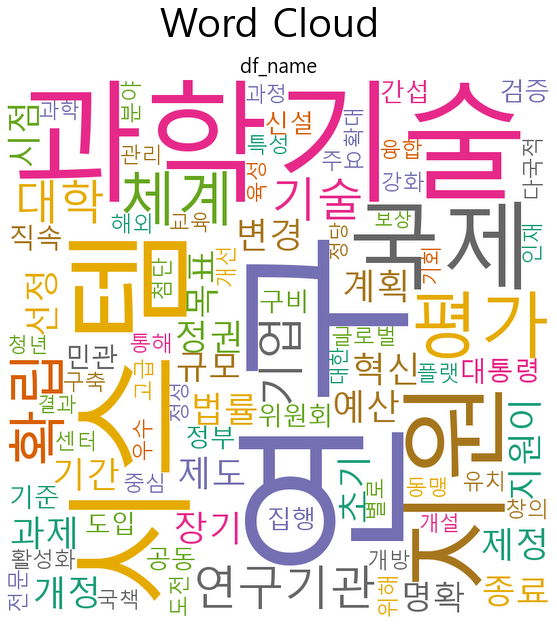

In [145]:
total_name = visualize(noun_list,"df_name")

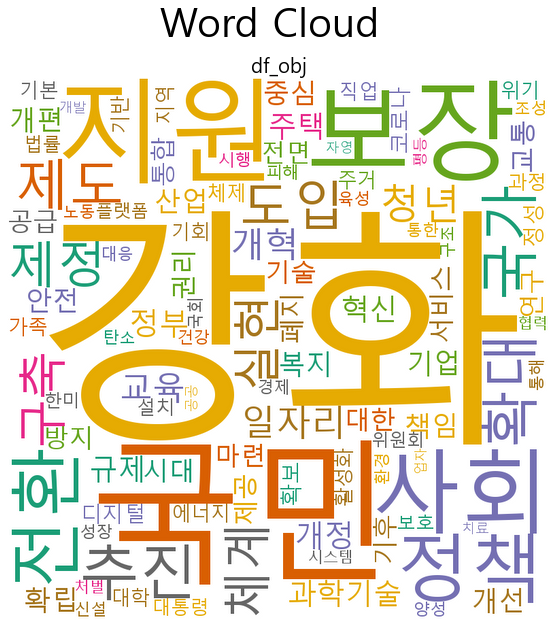

In [101]:
total_object = visualize(noun_list,"df_obj")

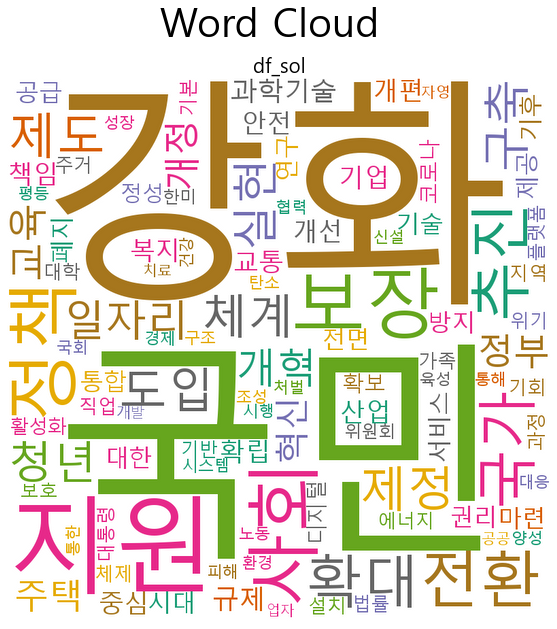

In [103]:
total_sol = visualize(noun_list,"df_sol")